# **Teste-t (para uma amostra)**

 **A média de altura da amostra coletada é diferente da média de altura nacional?**

In [ ]:
if(!require(dplyr))
  install.packages("dplyr")

In [ ]:
setwd("/content/data")

In [ ]:
dados = read.csv("db_Teste_t.csv", sep = ";", dec = ",") #check.names = F

In [ ]:
dados

In [ ]:
glimpse(dados)

Rows: 30
Columns: 7
$ Sujeito           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ Genero            <chr> "M", "F", "M", "M", "F", "F", "M", "M", "M", "M", "F…
$ Grau_de_Instrucao <chr> "Superior", "Superior", "Superior", "Ensino Fundamen…
$ N_Filhos          <int> 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 3, 0, 0, 1, 1, 0, 0…
$ Idade             <int> 31, 25, 33, 20, 23, 37, 38, 37, 34, 40, 41, 46, 26, …
$ Altura            <int> 160, 160, 157, 163, 163, 155, 165, 168, 163, 170, 17…
$ Salario           <dbl> 4.10, 2.65, 4.70, 1.45, 1.85, 2.20, 2.35, 2.70, 2.90…


### **Teste de Normalidade (Shapiro Wilk)**

In [ ]:
shapiro.test(dados$Altura)


	Shapiro-Wilk normality test

data:  dados$Altura
W = 0.95384, p-value = 0.214


### **Teste-t para uma amostra**

In [ ]:
t.test(dados$Altura, mu = 167)


	One Sample t-test

data:  dados$Altura
t = 0.70196, df = 29, p-value = 0.4883
alternative hypothesis: true mean is not equal to 167
95 percent confidence interval:
 164.2572 172.6095
sample estimates:
mean of x 
 168.4333 


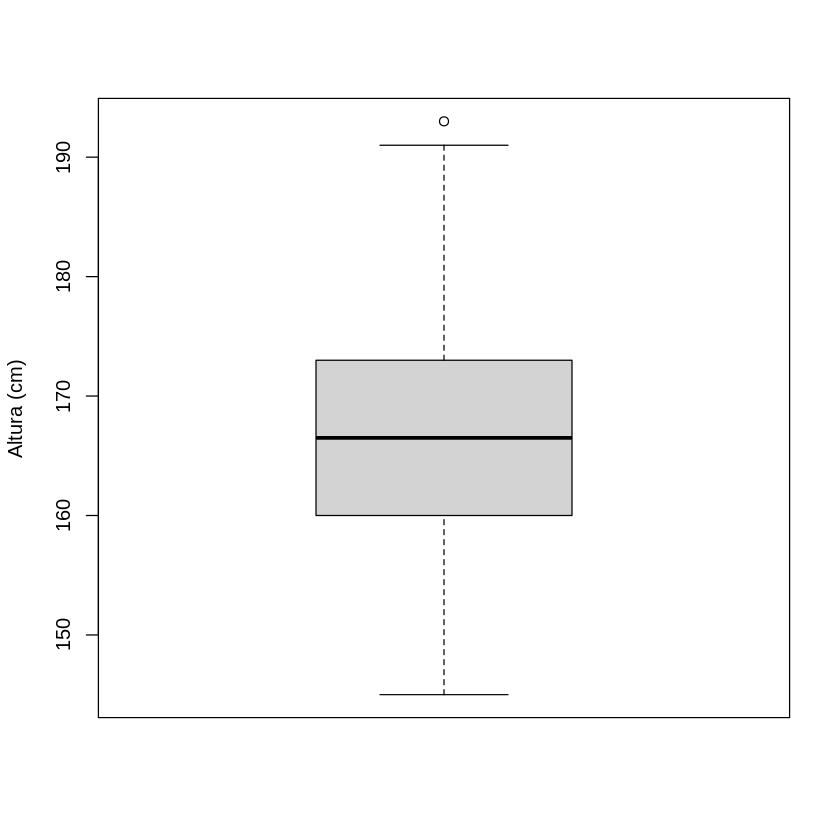

In [ ]:
boxplot(dados$Altura, ylab = "Altura (cm)")

***O Teste-t para uma amostra mostrou que a média da altura da amostra não é diferente da média da altura nacional
(t(29) = 0,702; p = 0,488)***


# **Teste-t (para duas amostras independentes)**

 **A posição que o aluno(a) ocupa na sala ("Frente" ou "Fundos") influencia em suas notas de Biologia, Física e História?**

In [ ]:
if(!require (dplyr))
  install.packages("dplyr")
library(dplyr)

if(!require (car))
  install.packages("car")
library(car)

# https://github.com/mixOmicsTeam/mixOmics
if(!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

if(!require (mixOmics))
    BiocManager::install('mixOmics')

if(!require (RVAideMemoire))
  install.packages("RVAideMemoire")
library(RVAideMemoire)

In [ ]:
setwd("/content/data")

In [ ]:
dados = read.csv2("db_Teste_t2.csv")

In [ ]:
head(dados)

,Sujeito,Genero,Escola,Posicao_Sala,Nota_Biol,Nota_Fis,Nota_Hist
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,M,Privada,Fundos,8.1,4.6,2.9
2,2,F,Privada,Fundos,5.3,4.9,6.4
3,3,M,Publica,Fundos,2.9,3.7,3.1
4,4,M,Publica,Fundos,3.7,3.8,4.9
5,5,F,Publica,Fundos,4.4,4.2,4.9
6,6,F,Publica,Fundos,4.7,4.9,5.5


In [ ]:
glimpse(dados)

Rows: 32
Columns: 7
$ Sujeito      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Genero       <chr> "M", "F", "M", "M", "F", "F", "M", "M", "M", "M", "F", "F…
$ Escola       <chr> "Privada", "Privada", "Publica", "Publica", "Publica", "P…
$ Posicao_Sala <chr> "Fundos", "Fundos", "Fundos", "Fundos", "Fundos", "Fundos…
$ Nota_Biol    <dbl> 8.1, 5.3, 2.9, 3.7, 4.4, 4.7, 5.4, 5.8, 3.1, 6.0, 2.0, 3.…
$ Nota_Fis     <dbl> 4.6, 4.9, 3.7, 3.8, 4.2, 4.9, 6.4, 6.8, 4.1, 6.9, 3.4, 3.…
$ Nota_Hist    <dbl> 2.9, 6.4, 3.1, 4.9, 4.9, 5.5, 7.4, 8.1, 3.3, 8.3, 2.3, 3.…


### **Teste de Normalidade (Shapiro Wilk) por grupo**

In [ ]:
byf.shapiro(Nota_Biol ~ Posicao_Sala, dados)


	Shapiro-Wilk normality tests

data:  Nota_Biol by Posicao_Sala 

            W p-value  
Frente 0.9852 0.99312  
Fundos 0.9003 0.06865 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
byf.shapiro(Nota_Fis ~ Posicao_Sala, dados)


	Shapiro-Wilk normality tests

data:  Nota_Fis by Posicao_Sala 

            W p-value
Frente 0.9327  0.2992
Fundos 0.9301  0.2186


In [ ]:
byf.shapiro(Nota_Hist ~ Posicao_Sala, dados)


	Shapiro-Wilk normality tests

data:  Nota_Hist by Posicao_Sala 

            W p-value  
Frente 0.8936 0.07594 .
Fundos 0.9168 0.13056  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### **Teste de Homogeneidade (Levene)**

In [ ]:
leveneTest(Nota_Biol ~ Posicao_Sala, dados, center = mean)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.035913,0.3169124
,30,NA,NA


In [ ]:
leveneTest(Nota_Fis ~ Posicao_Sala, dados, center = mean) # Não são Homogêneas

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,13.65752,0.0008749004
,30,NA,NA


In [ ]:
leveneTest(Nota_Hist ~ Posicao_Sala, dados, center = mean) # Não são Homogêneas

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,14.2921,0.0006954296
,30,NA,NA


### **Teste-t para amostras independentes**

In [ ]:
t.test(Nota_Biol ~ Posicao_Sala, dados, var.equal = TRUE)


	Two Sample t-test

data:  Nota_Biol by Posicao_Sala
t = 4.6027, df = 30, p-value = 7.136e-05
alternative hypothesis: true difference in means between group Frente and group Fundos is not equal to 0
95 percent confidence interval:
 1.411664 3.663630
sample estimates:
mean in group Frente mean in group Fundos 
            6.520000             3.982353 


In [ ]:
t.test(Nota_Fis ~ Posicao_Sala, dados, var.equal = FALSE)


	Welch Two Sample t-test

data:  Nota_Fis by Posicao_Sala
t = 4.4352, df = 17.683, p-value = 0.0003324
alternative hypothesis: true difference in means between group Frente and group Fundos is not equal to 0
95 percent confidence interval:
 1.342070 3.763812
sample estimates:
mean in group Frente mean in group Fundos 
            6.600000             4.047059 


In [ ]:
t.test(Nota_Hist ~ Posicao_Sala, dados, var.equal = FALSE)


	Welch Two Sample t-test

data:  Nota_Hist by Posicao_Sala
t = 1.5737, df = 19.909, p-value = 0.1313
alternative hypothesis: true difference in means between group Frente and group Fundos is not equal to 0
95 percent confidence interval:
 -0.3860238  2.7546513
sample estimates:
mean in group Frente mean in group Fundos 
            5.466667             4.282353 


### **Visualização da Distribuição dos Dados**

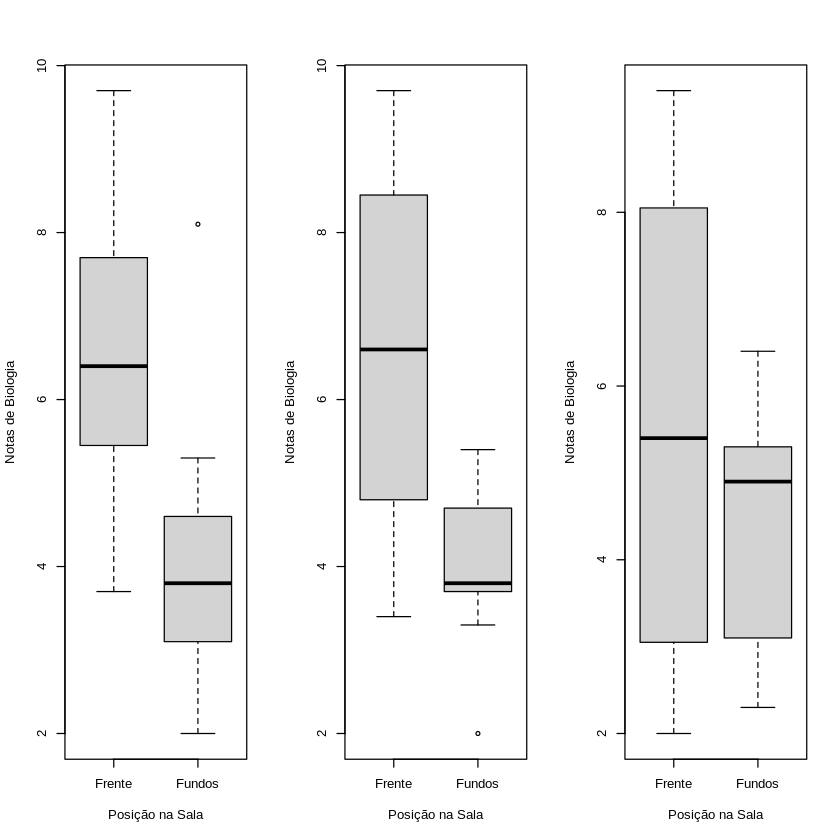

In [ ]:
par(mfrow = c(1, 3))

boxplot(dados$Nota_Biol ~ dados$Posicao_Sala, 
        ylab = "Notas de Biologia",
        xlab = "Posição na Sala"
)

boxplot(dados$Nota_Fis ~ dados$Posicao_Sala, 
        ylab = "Notas de Biologia",
        xlab = "Posição na Sala"
)

boxplot(dados$Nota_Hist ~ dados$Posicao_Sala, 
        ylab = "Notas de Biologia",
        xlab = "Posição na Sala"
)


***O Teste-t para duas amostras independentes mostrou que há efeito da posição na sala sobre a "Nota de Física" (t(17,68) = 4,44; p < 0,001), e sobre a "Nota de Biologia" (t(30) = 4,60; p < 0,001).
O grupo que senta na frente da sala apresentou, em média, notas de Física e Biologia superiores às do grupo que senta nos fundos da sala.***

# **Teste-t pareado**

 **Há diferença no número de convulsões por dia de cada indivíduo antes do tratamento e na primeira semana de tratamento?**

In [ ]:
if(!require (dplyr))
    install.packages("dplyr")
library(dplyr)

if(!require (psych))
    install.packages("psych")
library(psych)

In [ ]:
setwd("/content/data")

In [ ]:
dados = read.csv2("db_Teste_t3.csv")

In [ ]:
head(dados)

,ID_Paciente,ID_Medico,Genero,Data_Nasc,Convulsoes_PT,Convulsoes_S1,Convulsoes_S6
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,382,HQQS,Masculino,11/25/1967,3,3,3
2,06YO,IKGU,Masculino,08/16/1967,4,5,4
3,07GL,VLDP,Masculino,01/22/1972,3,1,2
4,07IT,SRKQ,Masculino,02/17/1987,7,7,4
5,827,WGSX,Feminino,02/09/1956,1,3,3
6,885,QYJV,Masculino,07/21/1960,4,1,1


In [ ]:
glimpse(dados)

Rows: 275
Columns: 7
$ ID_Paciente   <chr> "382", "06YO", "07GL", "07IT", "827", "885", "968", "0GT…
$ ID_Medico     <chr> "HQQS", "IKGU", "VLDP", "SRKQ", "WGSX", "QYJV", "RCGB", …
$ Genero        <chr> "Masculino", "Masculino", "Masculino", "Masculino", "Fem…
$ Data_Nasc     <chr> "11/25/1967", "08/16/1967", "01/22/1972", "02/17/1987", …
$ Convulsoes_PT <int> 3, 4, 3, 7, 1, 4, 3, 1, 6, 1, 1, 10, 1, 4, 4, 1, 1, 2, 7…
$ Convulsoes_S1 <int> 3, 5, 1, 7, 3, 1, 6, 1, 4, 0, 4, 8, 3, 1, 8, 1, 1, 6, 4,…
$ Convulsoes_S6 <int> 3, 4, 2, 4, 3, 1, 5, 2, 2, 0, 3, 7, 2, 1, 4, 3, 1, 3, 4,…


### **Teste de Normalidade (Shapiro Wilk)**

In [ ]:
dados$DIFPT_S1 = dados$Convulsoes_PT - dados$Convulsoes_S1

In [ ]:
shapiro.test(dados$DIFPT_S1) # em casos de p <= 0,05, utilizar "Teste de Wilcoxon"


	Shapiro-Wilk normality test

data:  dados$DIFPT_S1
W = 0.77534, p-value < 2.2e-16


### **Teste-t pareado**

In [ ]:
t.test(dados$Convulsoes_PT, dados$Convulsoes_S1, paired = TRUE)


	Paired t-test

data:  dados$Convulsoes_PT and dados$Convulsoes_S1
t = 3.6762, df = 274, p-value = 0.0002848
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.5033362 1.6639366
sample estimates:
mean difference 
       1.083636 


### **Estatística Descritiva**

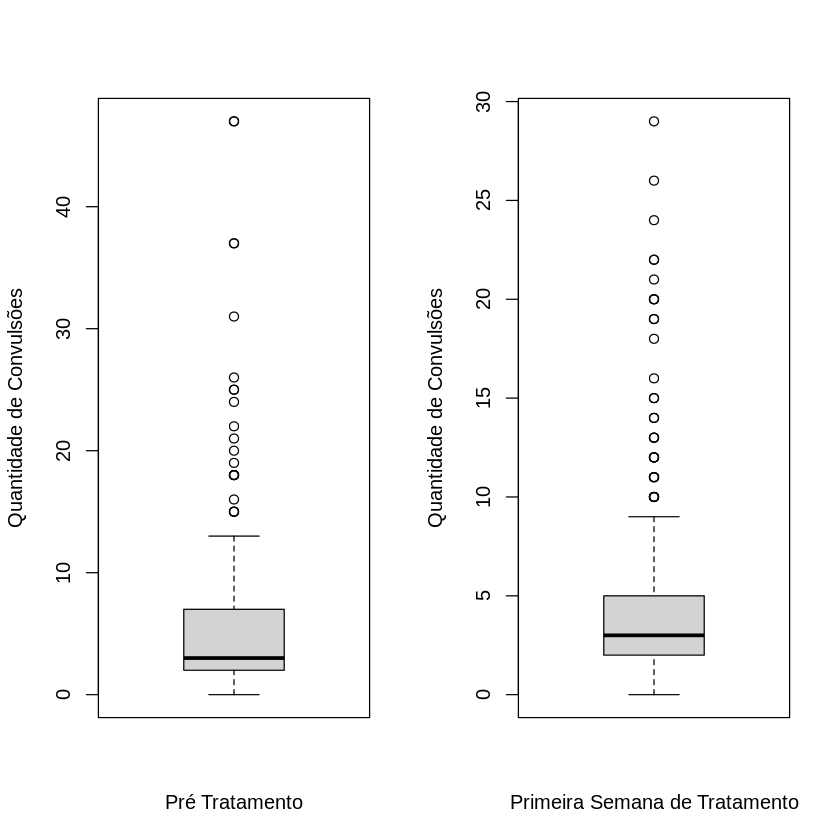

In [ ]:
par(mfrow = c(1,2))
boxplot(dados$Convulsoes_PT, ylab = "Quantidade de Convulsões", xlab = "Pré Tratamento")
boxplot(dados$Convulsoes_S1, ylab = "Quantidade de Convulsões", xlab = "Primeira Semana de Tratamento")

In [ ]:
summary(dados$Convulsoes_PT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   5.629   7.000  47.000 

In [ ]:
summary(dados$Convulsoes_S1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   4.545   5.000  29.000 

In [ ]:
describe(dados$Convulsoes_PT)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,275,5.629091,6.785065,3,4.262443,2.9652,0,47,47,3.135055,12.75627,0.4091548


In [ ]:
describe(dados$Convulsoes_S1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,275,4.545455,4.890846,3,3.529412,2.9652,0,29,29,2.297813,5.759225,0.2949291
